## 🎬 IMDB Movie Review Sentiment Dataset

### 🧾 Overview

The **IMDB Movie Review Dataset** is a widely used benchmark in Natural Language Processing (NLP) for **binary sentiment classification** — determining whether a movie review expresses a **positive** or **negative** opinion.

Each sample in the dataset is a single movie review written by a user on the [Internet Movie Database (IMDB)](https://www.imdb.com/), labeled as:

- **Positive (1):** The review reflects enjoyment or approval of the movie.
- **Negative (0):** The review expresses dislike or criticism of the movie.

The dataset contains:
- **25,000** labeled training reviews  
- **25,000** labeled test reviews  
All text data is preprocessed, and each review is already tokenized into words or indices (depending on the version you load).

---

### 📦 Dataset Source

This dataset is included in several libraries:

- **Keras / TensorFlow:**  
  ```python
  from tensorflow.keras.datasets import imdb
  (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

In [2]:
!pip install numpy pandas matplotlib seaborn scikit-learn

  Using cached pandas-2.3.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached matplotlib-3.10.7-cp311-cp311-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.7.2-cp311-cp311-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp311-cp311-macosx_10_9_universal2.whl.metadata (112 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-12.0.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (8.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoo

In [4]:
!pip install datasets --quiet

In [5]:

# If needed:
# %pip install datasets --quiet

import numpy as np, pandas as pd
from sklearn.model_selection import train_test_split

def load_imdb_via_hf(subset_train=20000, subset_test=5000, seed=7):
    """Load IMDB via Hugging Face datasets, returning raw text and labels.
    Subsample to keep runtime manageable.
    """
    try:
        from datasets import load_dataset
        ds = load_dataset("imdb")
        # Convert to pandas for easier subsampling
        train_df = pd.DataFrame({'text': ds['train']['text'], 'label': ds['train']['label']})
        test_df  = pd.DataFrame({'text': ds['test']['text'],  'label': ds['test']['label']})
        # Subsample
        train_df = train_df.sample(n=min(subset_train, len(train_df)), random_state=seed).reset_index(drop=True)
        test_df  = test_df.sample(n=min(subset_test,  len(test_df)),  random_state=seed).reset_index(drop=True)
        return train_df['text'].tolist(), train_df['label'].to_numpy(), test_df['text'].tolist(), test_df['label'].to_numpy()
    except Exception as e:
        print("HF datasets not available or failed:", e)
        return None

def load_imdb_via_keras(subset_train=20000, subset_test=5000, seed=7):
    """Fallback loader using Keras integer-encoded IMDB; returns decoded text strings if possible."""
    try:
        # %pip install tensorflow --quiet
        from tensorflow.keras.datasets import imdb
        from tensorflow.keras.preprocessing.sequence import pad_sequences
        from tensorflow.keras.datasets.imdb import get_word_index

        num_words = 50000
        (X_tr_i, y_tr), (X_te_i, y_te) = imdb.load_data(num_words=num_words)
        # Pad and decode into crude space-joined tokens
        word_index = get_word_index()
        index_word = {v+3: k for k,v in word_index.items()}
        index_word[0] = "<pad>"; index_word[1] = "<start>"; index_word[2] = "<unk>"; index_word[3] = "<unused>"
        def decode(seq):
            return " ".join(index_word.get(i, "<unk>") for i in seq)

        # Subsample
        rng = np.random.default_rng(seed)
        tr_idx = rng.choice(len(X_tr_i), size=min(subset_train, len(X_tr_i)), replace=False)
        te_idx = rng.choice(len(X_te_i), size=min(subset_test,  len(X_te_i)), replace=False)
        X_tr_txt = [decode(X_tr_i[i]) for i in tr_idx]
        X_te_txt = [decode(X_te_i[i]) for i in te_idx]
        y_tr_s = y_tr[tr_idx]; y_te_s = y_te[te_idx]
        return X_tr_txt, y_tr_s, X_te_txt, y_te_s
    except Exception as e:
        print("Keras IMDB not available or failed:", e)
        return None

# Try HF first, then Keras fallback
data = load_imdb_via_hf(subset_train=20000, subset_test=5000, seed=7)
if data is None:
    data = load_imdb_via_keras(subset_train=20000, subset_test=5000, seed=7)

if data is None:
    raise RuntimeError("Could not load IMDB via Hugging Face or Keras. Install one of them and retry.")

X_train_text, y_train, X_test_text, y_test = data
len(X_train_text), len(X_test_text), np.bincount(y_train), np.bincount(y_test)


/Users/architkiran/github-classroom/CS506-Boston-University/lab-8-architkiran/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(20000, 5000, array([ 9995, 10005]), array([2426, 2574]))

In [6]:
print(X_train_text[0][:100])

Not a movie for everyone, but this movie is in my top 10. I am a lover of black comedy. With a cast 


In [7]:
print(np.unique(y_train))

[0 1]


In [8]:
# Get the unique values and their counts
unique_values, counts = np.unique(y_test, return_counts=True)

# The number of unique values is simply the length of the unique_values array
num_unique_values = len(y_test)

print(f"Unique values: {y_test}")
print(f"Counts of unique values: {counts}")
print(f"Number of unique values: {num_unique_values}")

Unique values: [1 0 1 ... 0 0 1]
Counts of unique values: [2426 2574]
Number of unique values: 5000


In [9]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=50000,
    ngram_range=(1,2),
    min_df=2
)




### From‑Scratch Linear SVM on TruncatedSVD Features

Our NumPy‑only `LinearSVM` expects dense features. We’ll reuse the SVD‑reduced dense representation (200‑D) and train the from‑scratch model.



### 📚 Math for this section — TF‑IDF → SVD (LSA) → Linear SVM

**TF‑IDF weighting** for term \(t\) in document \(d\):
$
\mathrm{tf\!-\!idf}(t,d) = \mathrm{tf}(t,d)\cdot \underbrace{\log\frac{N}{\mathrm{df}(t)+1}}_{\mathrm{idf}(t)},
$
where $(\mathrm{tf}(t,d)$) is term frequency, $(\mathrm{df}(t)$) is document frequency, and \(N\) is #docs.

**Truncated SVD (LSA)** on sparse document–term matrix $(X) (size (N\times V$)):
$
X \approx U_k \Sigma_k V_k^\top,\quad \text{project } \mathbf{z}=\mathbf{x}V_k \in \mathbb{R}^k.
$

**Standardization** per feature $(j): (\tilde{z}_j = (z_j-\mu_j)/\sigma_j)$.

**Linear SVM hinge objective (binary)** with $(y_i'\in\{-1,+1\}$):

$$
\min_{\mathbf{w},b}\; \tfrac{1}{2}\lVert \mathbf{w}\rVert^2 + C\sum_i \max(0,\,1 - y_i'(\mathbf{w}^\top\mathbf{x}_i+b)).
$$

**Subgradient updates** (per sample) with margin $(m_i=y_i'(\mathbf{w}^\top\mathbf{x}_i+b)$):
$
\begin{aligned}
m_i \ge 1 &:&& \mathbf{w}\leftarrow \mathbf{w}-\eta\,\mathbf{w} \\
m_i < 1   &:&& \mathbf{w}\leftarrow \mathbf{w}-\eta\,(\mathbf{w}-C\,y_i'\mathbf{x}_i),\;\; b\leftarrow b+\eta\,C\,y_i'.
\end{aligned}
$

**Linear decision function:**
$s =  \mathbf{w}^\top\mathbf{x}_i+b$



Epoch 01/10  hinge+L2 loss: 37134.407
Epoch 02/10  hinge+L2 loss: 31522.231
Epoch 03/10  hinge+L2 loss: 26575.222
Epoch 04/10  hinge+L2 loss: 26145.255
Epoch 05/10  hinge+L2 loss: 28765.610
Epoch 06/10  hinge+L2 loss: 31773.076
Early stopping.
From-scratch Linear SVM — IMDB (SVD-200)
Train accuracy: 0.55455
              precision    recall  f1-score   support

         neg      0.556     0.540     0.548      9995
         pos      0.553     0.569     0.561     10005

    accuracy                          0.555     20000
   macro avg      0.555     0.555     0.554     20000
weighted avg      0.555     0.555     0.554     20000



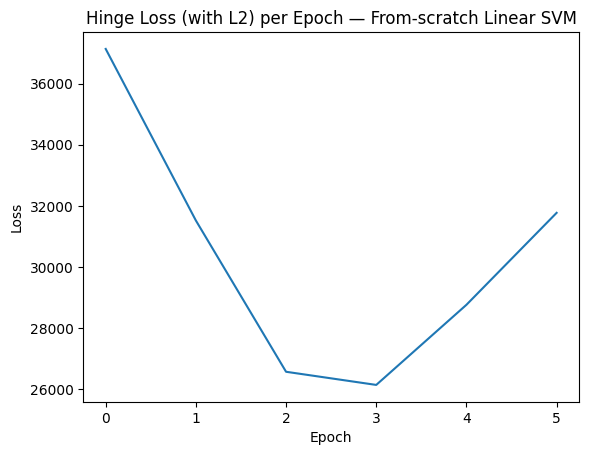

Epoch 01/10  hinge+L2 loss: 23941.789
Epoch 02/10  hinge+L2 loss: 22371.494
Epoch 03/10  hinge+L2 loss: 24038.043
Epoch 04/10  hinge+L2 loss: 21784.879
Epoch 05/10  hinge+L2 loss: 25272.195
Epoch 06/10  hinge+L2 loss: 25816.451
Early stopping.
From-scratch Linear SVM — IMDB (SVD-200)
Train accuracy: 0.56705
              precision    recall  f1-score   support

         neg      0.573     0.526     0.548      9995
         pos      0.562     0.608     0.584     10005

    accuracy                          0.567     20000
   macro avg      0.567     0.567     0.566     20000
weighted avg      0.567     0.567     0.566     20000



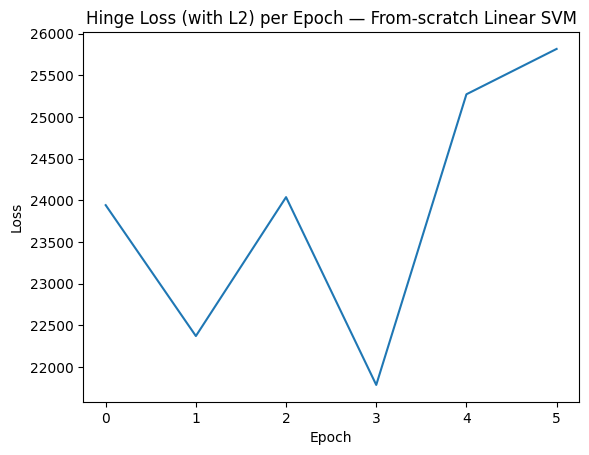

Epoch 01/10  hinge+L2 loss: 16119.565
Epoch 02/10  hinge+L2 loss: 16303.583
Epoch 03/10  hinge+L2 loss: 16596.927
Early stopping.
From-scratch Linear SVM — IMDB (SVD-200)
Train accuracy: 0.6321
              precision    recall  f1-score   support

         neg      0.625     0.658     0.641      9995
         pos      0.640     0.606     0.622     10005

    accuracy                          0.632     20000
   macro avg      0.632     0.632     0.632     20000
weighted avg      0.632     0.632     0.632     20000



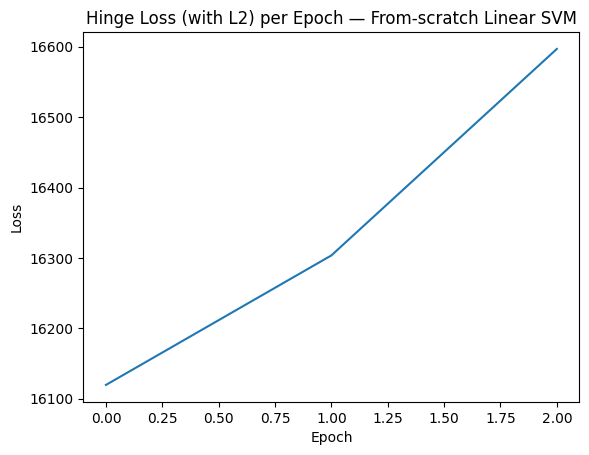

Epoch 01/10  hinge+L2 loss: 12439.642
Epoch 02/10  hinge+L2 loss: 12338.744
Epoch 03/10  hinge+L2 loss: 12424.389
Epoch 04/10  hinge+L2 loss: 12589.676
Early stopping.
From-scratch Linear SVM — IMDB (SVD-200)
Train accuracy: 0.7972
              precision    recall  f1-score   support

         neg      0.842     0.732     0.783      9995
         pos      0.763     0.862     0.810     10005

    accuracy                          0.797     20000
   macro avg      0.802     0.797     0.796     20000
weighted avg      0.802     0.797     0.796     20000



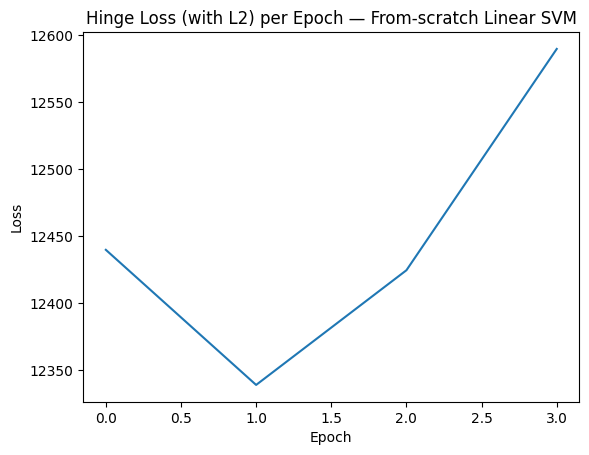

In [10]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# ---------------- From-scratch Linear SVM ----------------
class LinearSVMScratch:
    def __init__(self, C=1.0, lr=0.1, n_epochs=10, lr_decay=0.0, shuffle=True, random_state=7, early_stopping=False, es_patience=3):
        self.C = float(C)
        self.lr = float(lr)
        self.n_epochs = int(n_epochs)
        self.lr_decay = float(lr_decay)
        self.shuffle = bool(shuffle)
        self.random_state = int(random_state)
        self.early_stopping = bool(early_stopping)
        self.es_patience = int(es_patience)
        self.w_ = None
        self.b_ = 0.0
        self.loss_curve_ = []

    @staticmethod
    def _to_pm1(y):
        y = np.asarray(y).astype(int)
        if set(np.unique(y)) == {0,1}:
            return np.where(y==1, 1, -1)
        elif set(np.unique(y)) == {-1,1}:
            return y
        else:
            raise ValueError("Labels must be in {0,1} or {-1,+1}.")

    def _hinge_loss(self, X, ypm1):
        # ------------------------------------------------
        # TODO Refer to the Linear SVM hinge objective defined in the cell above (Exercise 1)
        # ------------------------------------------------
        margins = 1.0 - ypm1 * (X @ self.w_ + self.b_)
        loss = 0.5 * np.dot(self.w_, self.w_) + self.C * np.maximum(0.0, margins).sum()
        return loss
        # ----------------------------
        # Implementation Ends Here
        # ----------------------------

    def fit(self, X, y):
        rng = np.random.default_rng(self.random_state)
        X = np.asarray(X, dtype=float)
        ypm1 = self._to_pm1(y)
        n, d = X.shape
        self.w_ = np.zeros(d, dtype=float)
        self.b_ = 0.0
        idx = np.arange(n)
        best = np.inf
        bad = 0

        for epoch in range(self.n_epochs):
            if self.shuffle:
                rng.shuffle(idx)
            eta = self.lr / (1.0 + self.lr_decay * epoch)

            for i in idx:
                xi = X[i]; yi = ypm1[i]
                # ------------------------------------------------
                # TODO Refer to the Subgradient updates (per sample) with margin equation in the cell above (Exercise 2)
                # ------------------------------------------------
                margin = yi * (np.dot(self.w_, xi) + self.b_)
                if margin >= 1.0:
                    self.w_ -= eta * self.w_
                else:
                    self.w_ -= eta * (self.w_ - self.C * yi * xi)
                    self.b_ += eta * self.C * yi
                # ----------------------------
                # Implementation Ends Here
                # ----------------------------
                if margin >= 1.0:
                    self.w_ -= eta * self.w_
                else:
                    self.w_ -= eta * (self.w_ - self.C * yi * xi)
                    self.b_ += eta * self.C * yi

            loss = self._hinge_loss(X, ypm1)
            self.loss_curve_.append(float(loss))
            print(f"Epoch {epoch+1:02d}/{self.n_epochs}  hinge+L2 loss: {loss:.3f}")

            if self.early_stopping:
                if loss < best - 1e-4:
                    best = loss; bad = 0
                else:
                    bad += 1
                    if bad >= self.es_patience:
                        print("Early stopping.")
                        break

        return self

    def decision_function(self, X):
        # ------------------------------------------------
        # TODO Refer to the linear decision function equation in the cell above (Exercise 3)
        # ------------------------------------------------
        return X @ self.w_ + self.b_
        # ----------------------------
        # Implementation Ends Here
        # ----------------------------

    def predict(self, X):
        # ------------------------------------------------
        # TODO We want to utilize the decision_function we defined in LinearSVMScratch. (Exercise 4)
        # ------------------------------------------------
        s = self.decision_function(X)
        return (s >= 0.0).astype(int)
        # ----------------------------
        # Implementation Ends Here
        # ----------------------------
        return (s >= 0.0).astype(int)

# ---------------- Pipeline: TF-IDF -> SVD(200) -> Scaler ----------------
vectorizer = TfidfVectorizer(stop_words='english', max_features=60000, ngram_range=(1,2), min_df=2)
svd = TruncatedSVD(n_components=200, random_state=7)
scaler = StandardScaler(with_mean=True, with_std=True)

# Build numeric features
Xtr_sparse = vectorizer.fit_transform(X_train_text)
Xte_sparse = vectorizer.transform(X_test_text)

Xtr_red = svd.fit_transform(Xtr_sparse)
Xte_red = svd.transform(Xte_sparse)

Xtr = scaler.fit_transform(Xtr_red)
Xte = scaler.transform(Xte_red)

# ---------------- Train & Evaluate ----------------
for lr_val in [0.1,0.05,0.01,0.001]:
  svm = LinearSVMScratch(C=1.0, lr=lr_val, n_epochs=10, lr_decay=0.02, early_stopping=True, es_patience=2, random_state=7)
  svm.fit(Xtr, y_train)

  y_pred = svm.predict(Xtr)
  print("From-scratch Linear SVM — IMDB (SVD-200)")
  print("Train accuracy:", accuracy_score(y_train, y_pred))
  print(classification_report(y_train, y_pred, target_names=['neg','pos'], digits=3))

  # Plot training loss
  plt.figure()
  plt.plot(svm.loss_curve_)
  plt.title("Hinge Loss (with L2) per Epoch — From-scratch Linear SVM")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.show()


Epoch 01/10  hinge+L2 loss: 12439.642
Epoch 02/10  hinge+L2 loss: 12338.744
Epoch 03/10  hinge+L2 loss: 12424.389
Epoch 04/10  hinge+L2 loss: 12589.676
Early stopping.
From-scratch Linear SVM — IMDB (SVD-200)
Test accuracy: 0.7958
              precision    recall  f1-score   support

         neg      0.827     0.733     0.777      2426
         pos      0.773     0.855     0.812      2574

    accuracy                          0.796      5000
   macro avg      0.800     0.794     0.794      5000
weighted avg      0.799     0.796     0.795      5000



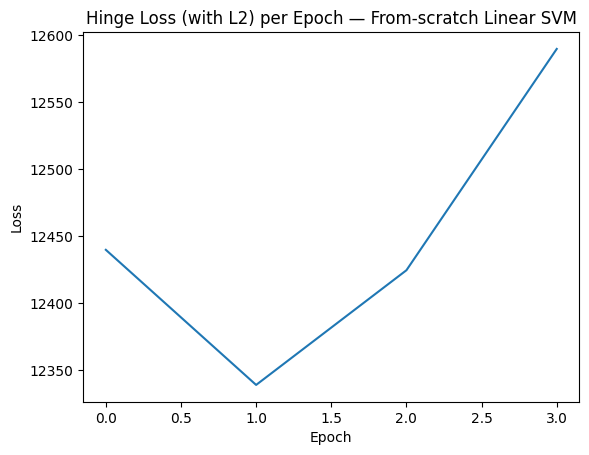

In [11]:
svm = LinearSVMScratch(C=1.0, lr=lr_val, n_epochs=10, lr_decay=0.02, early_stopping=True, es_patience=2, random_state=7)
svm.fit(Xtr, y_train)

y_pred = svm.predict(Xte)
print("From-scratch Linear SVM — IMDB (SVD-200)")
print("Test accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['neg','pos'], digits=3))

# Plot training loss
plt.figure()
plt.plot(svm.loss_curve_)
plt.title("Hinge Loss (with L2) per Epoch — From-scratch Linear SVM")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


In [12]:
from sklearn import svm
from sklearn.metrics import accuracy_score


# ------------------------------------------------
# TODO We will be utilizing the LinearSVC from sklearn, we will use a C=1, max_iter=2000, dual=True and random_state=7 (Exercise 5)
# First we will train on our data Xtr
# After we want to do predictions on the test data
# ------------------------------------------------
lin = svm.LinearSVC(C=1, max_iter=2000, dual=True, random_state=7)
lin.fit(Xtr, y_train)
pred_lin = lin.predict(Xte)
# ----------------------------
# Implementation Ends Here
# ----------------------------

print("LinearSVC — test accuracy:", accuracy_score(y_test, pred_lin))

LinearSVC — test accuracy: 0.8634


/Users/architkiran/github-classroom/CS506-Boston-University/lab-8-architkiran/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## 🧠 Mathematical Foundations of the Polynomial Kernel SVM

### 1. Problem Setup

We are given training data  
$
\{(\mathbf{x}_i, y_i)\}_{i=1}^n, \quad \mathbf{x}_i \in \mathbb{R}^d, \; y_i \in \{-1, +1\}.
$

The goal of a Support Vector Machine (SVM) is to find a decision function  
**Decision Function**: $
f(\mathbf{x}) = \sum_{j=1}^n \beta_j K(\mathbf{x}_j, \mathbf{x}) + b
$

that separates the two classes with the largest possible margin.

---

### 2. The Polynomial Kernel

Instead of using raw dot products, we map data into a higher-dimensional space via the **polynomial kernel**:
$
K(\mathbf{x}, \mathbf{z}) = (G\, \mathbf{x}^\top \mathbf{z} + c_0)^{d},
$
where:

- $( G > 0 )$ controls how strongly similarity depends on the dot product  
- $( c_0 )$ (often called `coef0` in code) shifts the kernel to include lower-order terms  
- $( d )$ is the **degree** of the polynomial and controls nonlinearity

This kernel implicitly represents all polynomial interactions between features up to degree $(d)$.

---

### 3. Regularized Risk (Squared Hinge Form)

We minimize the **regularized empirical risk** in the Reproducing Kernel Hilbert Space (RKHS):

$
J(\boldsymbol{\beta}, b) = \frac{\lambda}{2}\,\boldsymbol{\beta}^\top K \boldsymbol{\beta} + \frac{1}{n}\sum_{i=1}^n \max(0,\, 1 - y_i f_i)^2, \text{where} \quad f_i = (K\boldsymbol{\beta})_i + b \quad \text{and} \quad K_{ij} = K(\mathbf{x}_i, \mathbf{x}_j). $

- The first term $( \frac{\lambda}{2}\boldsymbol{\beta}^\top K \boldsymbol{\beta} )$ is a **regularizer** that penalizes model complexity.  
- The second term is the **squared hinge loss**, which penalizes samples that violate the margin constraint $( y_i f_i \ge 1 )$.

---

### 4. Gradient Derivations

Let $( r_i = \max(0, 1 - y_i f_i) )$.  
Only samples with $( y_i f_i < 1 )$ contribute to the gradient.

**Gradients:**

$ \nabla_{\boldsymbol{\beta}} J = \lambda K \boldsymbol{\beta} - \frac{2}{n}\, K(\mathbf{y} \odot \mathbf{r}), \nabla_b J = -\frac{2}{n}\sum_{i=1}^n y_i r_i.
$

Here $( \odot )$ denotes element-wise multiplication.

These are the update directions used by the optimizer in the implementation.

---

### 5. Optimization via Gradient Descent

We update parameters using gradient-based optimization (Adam in the code):

$
\boldsymbol{\beta} \leftarrow \boldsymbol{\beta} - \eta\, \nabla_{\boldsymbol{\beta}} J,
\quad
b \leftarrow b - \eta\, \nabla_b J.
$

Adam adaptively rescales these gradients using running estimates of their first and second moments.

---

### 6. Decision Function After Training

The learned decision function becomes:

$
f(\mathbf{x}) = \sum_{j=1}^n \beta_j K(\mathbf{x}_j, \mathbf{x}) + b,
$
and the prediction rule is:
$
\hat{y} = \operatorname{sign}(f(\mathbf{x})).
$

---

### 7. Interpretation

| Symbol | Meaning | Notes |
|:-------|:---------|:------|
| $(K(\mathbf{x}, \mathbf{z})$) | Polynomial kernel | Expands dot products to polynomial feature space |
| $(\boldsymbol{\beta}$) | Coefficients of the kernel expansion | Similar to dual variables \( \alpha \) in classic SVM |
| $(b$) | Bias/intercept | Shifts the decision boundary |
| $(\lambda$) | Regularization strength | Controls smoothness of boundary |
| $(r_i$) | Margin violation residual | Non-zero if $( y_i f_i < 1 $) |

The polynomial kernel allows the SVM to form **curved, nonlinear decision boundaries**.  
Higher degrees \(d\) increase flexibility, but also the risk of overfitting.

---

### 8. Summary of the Objective

The optimization performed in code minimizes:
$ \boxed{ \min_{\boldsymbol{\beta}, b} \left[ \frac{\lambda}{2}\boldsymbol{\beta}^\top K\boldsymbol{\beta} + \frac{1}{n}\sum_{i=1}^n \max(0, 1 - y_i((K\boldsymbol{\beta})_i + b))^2 \right] }
$

This is a smooth, differentiable version of the kernel SVM objective that can be solved by gradient descent without SMO or quadratic programming.

---


Dataset=moons, degree=3, gamma=1.0, coef0=1.0
Custom-GD:  lam=0.01  epochs=2000  lr=0.05  time=0.133s  train_acc=0.933  test_acc=0.928
sklearn SVC: C≈0.2381 time=0.001s  train_acc=0.919  test_acc=0.922


/Users/architkiran/github-classroom/CS506-Boston-University/lab-8-architkiran/.venv/lib/python3.11/site-packages/matplotlib/colors.py:2294: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/Users/architkiran/github-classroom/CS506-Boston-University/lab-8-architkiran/.venv/lib/python3.11/site-packages/matplotlib/colors.py:2295: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/Users/architkiran/github-classroom/CS506-Boston-University/lab-8-architkiran/.venv/lib/python3.11/site-packages/matplotlib/colors.py:2294: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/Users/architkiran/github-classroom/CS506-Boston-University/lab-8-architkiran/.venv/lib/python3.11/site-packages/matplotlib/colors.py:2295: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


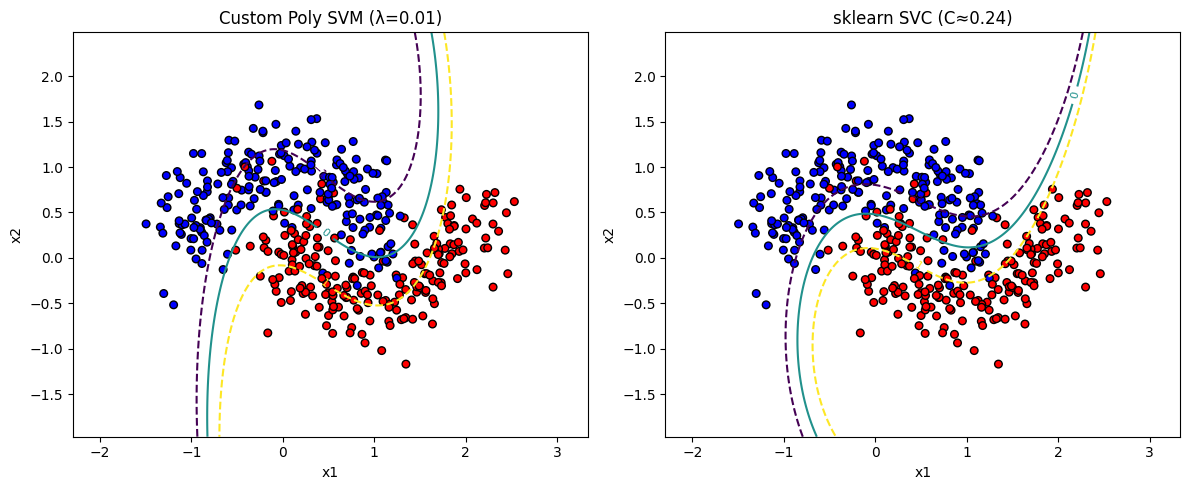

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn.svm import SVC
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split

# ------------------- Your gradient-based poly SVM (no SMO) ------------------- #
class PolyKernelSVM_GD:
    """
    Kernel SVM via gradient descent (squared hinge in a kernelized primal).
    J(β, b) = (λ/2) * β^T K β + (1/n) * Σ_i max(0, 1 - y_i * (Kβ + b)_i)^2
    Decision: f(x) = Σ_j β_j K(x_j, x) + b
    Labels in {-1, +1}.
    """
    def __init__(self, degree=3, gamma=None, coef0=1.0, lam=1e-2,
                 lr=5e-2, epochs=2000, adam_beta1=0.9, adam_beta2=0.999, adam_eps=1e-8,
                 random_state=0, verbose=False):
        self.degree = int(degree)
        self.gamma = (1.0) if gamma is None else float(gamma)
        self.coef0 = float(coef0)
        self.lam = float(lam)
        self.lr = float(lr)
        self.epochs = int(epochs)
        self.beta1 = float(adam_beta1)
        self.beta2 = float(adam_beta2)
        self.adam_eps = float(adam_eps)
        self.rs = np.random.RandomState(random_state)
        self.verbose = verbose
        self.X = None; self.beta = None; self.b = 0.0; self.K = None

    def _poly_kernel(self, X, Z):
        X = np.asarray(X, dtype=float); Z = np.asarray(Z, dtype=float)
        g = self.gamma if self.gamma is not None else 1.0 / X.shape[1]
        # ------------------------------------------------
        # TODO Refer to the Polynomial Kernel section in the cell above (Exercise 6)
        # ------------------------------------------------
        return (g * (X @ Z.T) + self.coef0) ** self.degree
        # ----------------------------
        # Implementation Ends Here
        # ----------------------------

    def fit(self, X, y):
        X = np.asarray(X, dtype=float)
        y = (np.asarray(y, dtype=float))
        assert set(np.unique(y)).issubset({-1.0, 1.0}), "Labels must be {-1,+1}"
        n = X.shape[0]
        self.X = X
        # ------------------------------------------------
        # TODO Refer to the Polynomial Kernel section in the cell above (Exercise 7)
        # Hint we might use X twice (since we are building the training kernel matrix between every pair of training samples)
        # ------------------------------------------------
        self.K = self._poly_kernel(X, X)
        # ----------------------------
        # Implementation Ends Here
        # ----------------------------
        self.beta = np.zeros(n); self.b = 0.0

        m_beta = np.zeros_like(self.beta); v_beta = np.zeros_like(self.beta)
        m_b = 0.0; v_b = 0.0

        for t in range(1, self.epochs + 1):
            # ------------------------------------------------
            #TODO Refer to the decision function defined in the 1) Problem Setup in the cell above (Exercise 8)
            # ------------------------------------------------
            f = self.K @ self.beta + self.b
            # ----------------------------
            # Implementation Ends Here
            # ----------------------------
            margin = y * f
            r = np.clip(1.0 - margin, 0.0, None)

            grad_beta = self.lam * (self.K @ self.beta) - (2.0 / n) * (self.K @ (y * r))
            grad_b = -(2.0 / n) * np.sum(y * r)

            m_beta = self.beta1*m_beta + (1-self.beta1)*grad_beta
            v_beta = self.beta2*v_beta + (1-self.beta2)*(grad_beta**2)
            m_b = self.beta1*m_b + (1-self.beta1)*grad_b
            v_b = self.beta2*v_b + (1-self.beta2)*(grad_b**2)

            m_beta_hat = m_beta / (1 - self.beta1**t)
            v_beta_hat = v_beta / (1 - self.beta2**t)
            m_b_hat = m_b / (1 - self.beta1**t)
            v_b_hat = v_b / (1 - self.beta2**t)

            self.beta -= self.lr * m_beta_hat / (np.sqrt(v_beta_hat) + self.adam_eps)
            self.b    -= self.lr * m_b_hat / (np.sqrt(v_b_hat) + self.adam_eps)

            if self.verbose and (t % max(1, self.epochs // 10) == 0 or t == 1):
                reg = 0.5 * self.lam * (self.beta @ (self.K @ self.beta))
                loss = (r ** 2).mean()
                print(f"[{t:5d}/{self.epochs}] loss={loss:.4f} reg={reg:.4f} obj={loss+reg:.4f}")
        return self

    def decision_function(self, Xq):
        Kq = self._poly_kernel(np.asarray(Xq, dtype=float), self.X)
        # ------------------------------------------------
        #TODO Refer to the decision function after training section defined in the cell above (Exercise 9)
        # ------------------------------------------------
        return Kq @ self.beta + self.b
        # ----------------------------
        # Implementation Ends Here
        # ----------------------------

    def predict(self, Xq):
        return np.where(self.decision_function(Xq) >= 0.0, 1.0, -1.0)

# ------------------- Helpers ------------------- #
def plot_side_by_side(models, titles, X, y):
    x_min, x_max = X[:,0].min()-0.8, X[:,0].max()+0.8
    y_min, y_max = X[:,1].min()-0.8, X[:,1].max()+0.8
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                         np.linspace(y_min, y_max, 400))
    grid = np.c_[xx.ravel(), yy.ravel()]
    fig, axes = plt.subplots(1, len(models), figsize=(6*len(models), 5))
    if len(models) == 1: axes = [axes]
    for ax, model, title in zip(axes, models, titles):
        zz = model.decision_function(grid).reshape(xx.shape)
        ax.contourf(xx, yy, np.sign(zz), levels=[-np.inf,0,np.inf], alpha=0.2)
        cs = ax.contour(xx, yy, zz, levels=[-1,0,1], linestyles=['--','-','--'])
        ax.clabel(cs, inline=True, fontsize=8)
        ax.scatter(X[:,0], X[:,1], c=(y>0).astype(int), cmap='bwr', edgecolor='k', s=30)
        ax.set_title(title); ax.set_xlabel("x1"); ax.set_ylabel("x2")
    plt.tight_layout(); plt.show()

# ------------------- Config ------------------- #
DATASET = "moons"      # "moons" or "circles"
NOISE = 0.25
N_SAMPLES = 600
TEST_SIZE = 0.3
RS = 42

DEGREE = 3
GAMMA = 1.0
COEF0 = 1.0

# λ ↔ C rough mapping:
# For squared hinge with averaging over n, a common heuristic is C ≈ 1/(λ n).
# You can tweak around this to match margins more closely.
def lambda_to_C(lam, n): return 1.0 / (lam * n)

LAM = 1e-2
EPOCHS = 2000
LR = 5e-2

# ------------------- Data ------------------- #
if DATASET == "moons":
    X, y01 = make_moons(n_samples=N_SAMPLES, noise=NOISE, random_state=RS)
elif DATASET == "circles":
    X, y01 = make_circles(n_samples=N_SAMPLES, noise=NOISE, factor=0.5, random_state=RS)
else:
    raise ValueError("DATASET must be 'moons' or 'circles'.")

y = 2*y01 - 1  # {0,1} -> {-1,+1}
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=TEST_SIZE, random_state=RS, stratify=y01)

# ------------------- Train: custom ------------------- #
t0 = time()
custom = PolyKernelSVM_GD(
    degree=DEGREE, gamma=GAMMA, coef0=COEF0,
    lam=LAM, lr=LR, epochs=EPOCHS, verbose=False, random_state=RS
).fit(X_tr, y_tr)
t_custom = time() - t0

# ------------------- Train: sklearn ------------------- #
C = lambda_to_C(LAM, n=X_tr.shape[0])
t1 = time()

# ------------------------------------------------
# TODO We will be utilizing the SVC from sklearn (sklearn.svm.SVC), we will use a kernel="poly", degree=DEGREE, gamma=GAMMA, coef0=COEF0, C=C (Exercise 10)
# We will train on the X_tr data and y_tr, remember sklearn expects y_tr to be {0,1}
# ------------------------------------------------
sk = SVC(kernel="poly", degree=DEGREE, gamma=GAMMA, coef0=COEF0, C=C)
sk.fit(X_tr, (y_tr > 0).astype(int))  # sklearn expects {0,1}
# ----------------------------
# Implementation Ends Here
# ----------------------------
t_sk = time() - t1

# ------------------- Evaluate ------------------- #
def acc(model, X, y):
    yp = model.predict(X)
    # unify label spaces
    if yp.min() >= 0:  # sklearn: {0,1}
        yp = np.where(yp==1, 1, -1)
    return (yp == y).mean()

train_acc_custom = acc(custom, X_tr, y_tr)
test_acc_custom  = acc(custom, X_te, y_te)

train_acc_sk = acc(sk, X_tr, y_tr)
test_acc_sk  = acc(sk, X_te, y_te)

print(f"Dataset={DATASET}, degree={DEGREE}, gamma={GAMMA}, coef0={COEF0}")
print(f"Custom-GD:  lam={LAM}  epochs={EPOCHS}  lr={LR}  time={t_custom:.3f}s  "
      f"train_acc={train_acc_custom:.3f}  test_acc={test_acc_custom:.3f}")
print(f"sklearn SVC: C≈{C:.4f} time={t_sk:.3f}s  "
      f"train_acc={train_acc_sk:.3f}  test_acc={test_acc_sk:.3f}")

# ------------------- Plot side-by-side ------------------- #
# Wrap sklearn model with a decision_function in {-1,+1} convention
class SKWrap:
    def __init__(self, svc): self.svc = svc
    def decision_function(self, Xq):
        return self.svc.decision_function(Xq)
    def predict(self, Xq):
        return np.where(self.svc.decision_function(Xq) >= 0, 1, -1)

plot_side_by_side(
    [custom, SKWrap(sk)],
    [f"Custom Poly SVM (λ={LAM})", f"sklearn SVC (C≈{C:.2g})"],
    X_tr, y_tr
)


# **Questions and Answers** (10 points)

---

### **1. Regularization Parameter**  

What role does the regularization parameter (C) play in a Linear SVM?

**Answer:** 'C' controls the trade off between maximizing the margin and minimizing classification errors, large 'C' fits the training data more tightly, while a small 'C' allows a wider margin with more missclassifications.

### **2. Linear SVM's**

Why are Linear SVMs typically preferred for high-dimensional, sparse datasets (like TF-IDF text features)?

**Answer:**Linear SVMs are preferred for high-dimentional, sparse datasets like TF-IDF text features because they are computationally efficient, avoid kernel overhead, and still perform well when data are lineraly separable in that space.

### **3. Polynomial SVM's**
How do the parameters degree (d), gamma (G), and coef0 (c₀) influence the decision boundary?

**Answer:**
- Degree(d): Controls the complexity of the boundry.
- Gamma(G): Scales the influence of feature interactions.
- coef0(c₀): Shifts the kernel tp include lower order terms, balancing linear and higher order effects.

### **4. Overfitting Polynomial SVM**
Why might a Polynomial SVM overfit more easily than a Linear SVM?

**Answer:**It can overfit because of higher degree kernels as they create very flexible and complex boundries that fit noise and minor variations in the training data.

### **5. Polynomial Kernel Purpose**
Why does a Polynomial kernel make linear classifiers capable of separating nonlinear data?

**Answer:**It implicitly maps inputs into a higher dimensional feature space, allowing the linear classifier to seperate data that are not linearly seperable in the original space.